### LIMPIEZA DE TABLA

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar el csv de los tiburones

data = pd.read_csv('C:\\Users\\chiin\\Desktop\\Proyecto_Tiburon\\attacks.csv', encoding='latin-1', low_memory = False)

In [3]:
data.shape

(25723, 24)

In [4]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### Borrar nulos y duplicados en filas enteras

In [5]:
#borrar todas las filas donde toda la fila sean valores nulos

data = data.dropna(axis = 0, how='all')

data.shape

(8703, 24)

In [6]:
# Borrar duplicados

data = data.drop_duplicates()

data.shape

(6311, 24)

In [7]:
# Resetear el index sin crear una columna nueva llamada Index

data.reset_index(drop = True, inplace=True)

data.shape

(6311, 24)

In [8]:
# Vamos a borrar filas con mas de un 90 % de valores nulos 

umbral = int(data.shape[1] * 0.1)

data= data.dropna(thresh=umbral)

data.shape

(6309, 24)

In [9]:
# Mirar la suma de valores nulos en cada columna

nan_cols = data.isna().sum()

nan_cols[nan_cols>0]

Case Number                  1
Date                         7
Year                         9
Type                        11
Country                     57
Area                       462
Location                   547
Activity                   551
Name                       217
Sex                        572
Age                       2838
Injury                      35
Fatal (Y/N)                546
Time                      3361
Species                   2845
Investigator or Source      24
pdf                          7
href formula                 8
href                         7
Case Number.1                7
Case Number.2                7
Unnamed: 22               6308
Unnamed: 23               6307
dtype: int64

In [10]:
data.shape

(6309, 24)

### LIMPIEZA DE LA COLUMNA 'Fatal (Y/N)'

In [11]:
data['Fatal (Y/N)'].value_counts(normalize=True) * 100

N          74.492452
Y          24.084678
UNKNOWN     1.231997
 N          0.121465
M           0.017352
2017        0.017352
N           0.017352
y           0.017352
Name: Fatal (Y/N), dtype: float64

In [12]:
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].str.lower()

data['Fatal (Y/N)'].value_counts(normalize=True) * 100

n          74.492452
y          24.102030
unknown     1.231997
 n          0.121465
m           0.017352
2017        0.017352
n           0.017352
Name: Fatal (Y/N), dtype: float64

In [13]:
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].replace({' n' : 'n','m' : 'n'})
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].str.strip()

data['Fatal (Y/N)'].value_counts(normalize=True) * 100

n          74.648621
y          24.102030
unknown     1.231997
2017        0.017352
Name: Fatal (Y/N), dtype: float64

In [14]:
# Eliminadas las filas donde el ataque no sea mortal o no

data.shape

(6309, 24)

In [15]:
data.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,n,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,n,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,n,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,n,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### Renombre de columnas para que sea mas fácil

In [16]:
data.columns = [col.lower().replace(' ', '') for col in data.columns]
data.columns = data.columns.str.strip()

data.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species', 'investigatororsource', 'pdf', 'hrefformula', 'href',
       'casenumber.1', 'casenumber.2', 'originalorder', 'unnamed:22',
       'unnamed:23'],
      dtype='object')

### Limpieza columnas casenumber y date

In [17]:
def transformar(x):
    try:
        return x.replace('.', '-')
    except:
        return np.nan
    

In [18]:
data.casenumber = data.casenumber.apply(transformar)

data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,n,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,n,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,n,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,n,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [19]:
# Vamos a limpiar la columna de case number

def filter_date(x):

    value = str(x)
    pattern = r"\d{4}\-\d{2}\-\d{2}"

    match = re.search(pattern, value)
    if match:
        clean_date = match.group()
        return clean_date
    else:
        return np.nan
    

In [20]:
data.casenumber = data.casenumber.apply(filter_date)

data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,n,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,n,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,n,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,n,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [21]:
def filter_date2(fecha):
    fecha=str(fecha)
    try:
        year, month, day = fecha.split('-')
        if month == '00' or day == '00' or len(year) != 4:
            return np.nan
        #pd.to_datetime(fecha)
        return fecha
    except:
        return np.nan

In [22]:
data.casenumber = data.casenumber.apply(filter_date2)

data.tail()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
6304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN
6305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
6306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN


In [23]:
data.casenumber.isnull().sum()

884

In [24]:
data=data.dropna(subset=['casenumber'])

data.tail()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
6151,1751-07-27,27-Jul-1751,1751.0,Unprovoked,USA,Massachusetts,NaN,Swimming,male,M,NaN,FATAL,y,NaN,NaN,"Pennsylvania Gazette, 8/15/1751",1751.07.27-Massachusetts.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1751.07.27,1751.07.27,152.0,NaN,NaN
6155,1742-12-17,17-Dec-1742,1742.0,Unprovoked,NaN,NaN,Carlisle Bay,Swimming,2 impressed seamen,M,NaN,FATAL,y,NaN,NaN,"C. Moore, GSAF",1742.12.17-AdviceSeamen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1742.12.17,1742.12.17,148.0,NaN,NaN
6156,1738-04-06,Reported 06-Apr-1738,1738.0,Unprovoked,ITALY,Sicily,Strait of Messina,Swimming,male,M,NaN,FATAL,y,NaN,NaN,"C. Moore, GSAF",1738.04.06.R-Messina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1738.04.06.R,1738.04.06.R,147.0,NaN,NaN
6160,1703-03-26,26-Mar-1703,1703.0,Unprovoked,BARBADOS,Southwest coast,Carlisle Bay,Swimming,"Samuel Jennings, a deserter from the British f...",M,19,"Hand and foot severely bitten, surgically ampu...",n,Night,NaN,"W.R.Cutter, Vol.1, p.252",1703.03.26-Jennings.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1703.03.26,1703.03.26,143.0,NaN,NaN
6170,1580-01-10,Letter dated 10-Jan-1580,1580.0,Unprovoked,Between PORTUGAL & INDIA,NaN,NaN,Man fell overboard from ship. Those on board t...,male,M,NaN,"FATAL. ""Shark tore him to pieces.",y,NaN,NaN,"G.P. Whitley, p. 10",1580.01.10.R-Portugal-India.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1580.01.10.R,1580.01.10.R,133.0,NaN,NaN


In [25]:
data.date = data.casenumber

data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018-06-25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018-06-18,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,n,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018-06-09,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,n,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018-06-08,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,n,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018-06-04,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,n,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### Limpieza columna year

In [26]:
data.year = data.casenumber.str.slice(0,4)

data.head(100)

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018-06-25,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018-06-18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,n,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018-06-09,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,n,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018-06-08,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,n,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018-06-04,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,n,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018-06-03,2018-06-03,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",n,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018-06-03,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018-05-27,2018-05-27,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,n,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018-05-26,2018-05-26,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,n,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018-05-26,2018-05-26,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,n,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


### Limpieza columna location

In [27]:
# comprobar cuantas localizaciones hay nulas

data.location.isnull().sum()

358

In [28]:
#rellenamos los nulos con desconocido

data.location = data.location.fillna('unknown')

data.location.isnull().sum()

0

### Limpieza columna area

In [29]:
# comprobar cuantas areas hay nulas

data.area.isnull().sum()

321

In [30]:
#rellenamos los nulos con desconocido

data.area = data.area.fillna('unknown')

data.area.isnull().sum()

0

### Limpieza columna country

In [31]:
# comprobar cuantos countrys hay nulos

data.country.isnull().sum()

32

In [32]:
#rellenamos los nulos con desconocido

data.country = data.country.fillna('unknown')

data.country.isnull().sum()

0

In [33]:
data.tail(10)

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
6140,1784-12-12,1784-12-12,1784,Unprovoked,JAMAICA,unknown,Kingston,Swimming,Richard Page,M,NaN,NaN,y,22h00,NaN,"The Pennsylvaia Gazette, 3/16/1785",1784.12.12-Page.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1784.12.12,1784.12.12,163.0,NaN,NaN
6141,1783-03-02,1783-03-02,1783,Sea Disaster,MARTINIQUE,unknown,Foundering of the privateer Holker,NaN,NaN,M,NaN,Many of the crew were taken by sharks,y,06h00,NaN,"C.Moore, GSAF",1783.03.02-Martinique.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1783.03.02,1783.03.02,162.0,NaN,NaN
6142,1780-08-08,1780-08-08,1780,Unprovoked,USA,Florida,"Pensacola Harbor, Escambia County",Swimming,Joseph Feron,M,NaN,FATAL,y,NaN,NaN,"C.Moore, GSAF",1780.08.08-Feron.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1780.08.08,1780.08.08,161.0,NaN,NaN
6146,1771-07-12,1771-07-12,1771,Unprovoked,USA,unknown,Damiscotte,Fishing,male,M,NaN,FATAL,y,NaN,NaN,"C. Moore, GSAF",1771.07.12.R-Damiscotte.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1771.07.12.R,1771.07.12.R,157.0,NaN,NaN
6150,1753-10-27,1753-10-27,1753,Unprovoked,JAMAICA,unknown,Kingston Harbor,Fell overboard,male,M,NaN,FATAL,y,NaN,NaN,"Maryland Gazette, 1/31/1754",1753.10.27.R-Jamaica.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1753.10.27.R,1753.10.27.R,153.0,NaN,NaN
6151,1751-07-27,1751-07-27,1751,Unprovoked,USA,Massachusetts,unknown,Swimming,male,M,NaN,FATAL,y,NaN,NaN,"Pennsylvania Gazette, 8/15/1751",1751.07.27-Massachusetts.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1751.07.27,1751.07.27,152.0,NaN,NaN
6155,1742-12-17,1742-12-17,1742,Unprovoked,unknown,unknown,Carlisle Bay,Swimming,2 impressed seamen,M,NaN,FATAL,y,NaN,NaN,"C. Moore, GSAF",1742.12.17-AdviceSeamen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1742.12.17,1742.12.17,148.0,NaN,NaN
6156,1738-04-06,1738-04-06,1738,Unprovoked,ITALY,Sicily,Strait of Messina,Swimming,male,M,NaN,FATAL,y,NaN,NaN,"C. Moore, GSAF",1738.04.06.R-Messina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1738.04.06.R,1738.04.06.R,147.0,NaN,NaN
6160,1703-03-26,1703-03-26,1703,Unprovoked,BARBADOS,Southwest coast,Carlisle Bay,Swimming,"Samuel Jennings, a deserter from the British f...",M,19,"Hand and foot severely bitten, surgically ampu...",n,Night,NaN,"W.R.Cutter, Vol.1, p.252",1703.03.26-Jennings.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1703.03.26,1703.03.26,143.0,NaN,NaN
6170,1580-01-10,1580-01-10,1580,Unprovoked,Between PORTUGAL & INDIA,unknown,unknown,Man fell overboard from ship. Those on board t...,male,M,NaN,"FATAL. ""Shark tore him to pieces.",y,NaN,NaN,"G.P. Whitley, p. 10",1580.01.10.R-Portugal-India.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1580.01.10.R,1580.01.10.R,133.0,NaN,NaN


### Limpieza columna activity

In [34]:
# comprobar si hay nulos

data.activity.isnull().sum()

386

In [35]:
# rellenar nulos con desconocido

data.activity = data.activity.fillna('unknown')

data.activity.isnull().sum()

0

In [36]:
data.tail(50)

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
6085,1832-06-04,1832-06-04,1832,Unprovoked,AUSTRALIA,New South Wales,"South Head, Sydney",Fishing,Aboriginal female,F,NaN,Leg severed,n,NaN,NaN,"Sydney Herald, 6/11/1832",1832.06.04-AboriginalWoman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1832.06.04,1832.06.04,218.0,NaN,NaN
6086,1832-01-23,1832-01-23,1832,Unprovoked,AUSTRALIA,New South Wales,Sydney,Bathing,male,M,NaN,Laceration to leg,n,NaN,NaN,"Sydney Herald, 1/23/1832",1832.01.23.R-Wilshire-slaughter-house.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1832.01.23.R,1832.01.23.R,217.0,NaN,NaN
6087,1831-08-24,1831-08-24,1831,Boat,USA,CUBA,Near Havana,American schooner Orator capsized,crew x 2,M,NaN,FATAL,y,NaN,NaN,"New York Evening Post, 9/14/1831",1831.08.24-Orator.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1831.08.24,1831.08.24,216.0,NaN,NaN
6088,1831-01-22,1831-01-22,1831,Invalid,AUSTRALIA,Tasmania,Hobart,"Boat capsized, clinging to line",Robert Dudlow,M,NaN,"Drowned, no shark involvement",NaN,NaN,Invalid,"C. Black, GSAF; Sydney Gazette, 1/22/1831",1831.01.22.R-Dudlow.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1831.01.22.R,1831.01.22.R,215.0,NaN,NaN
6089,1830-07-26,1830-07-26,1830,Unprovoked,USA,Massachusetts,"Swampscott, Essex County","Fishing from dory, shark upset boat & he fell ...",Joseph Blaney,M,52,FATAL,y,NaN,NaN,"Huron Sun, 8/3/1830",1830.07.26-JosephBlaney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1830.07.26,1830.07.26,214.0,NaN,NaN
6090,1830-07-02,1830-07-02,1830,Unprovoked,INDIA,Tamil Nadu,Madras,Washing a dog,male,M,NaN,FATAL,y,Evening,NaN,"Madras Courier, 7/2/1830",1830.07.02.R-Madras.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1830.07.02.R,1830.07.02.R,213.0,NaN,NaN
6091,1830-04-30,1830-04-30,1830,Unprovoked,INDIA,Tamil Nadu,St. Thomé,Bathing,Ensign Bromwick,M,NaN,FATAL,y,17h00-18h00,NaN,"Madras Gazette, 5/1/1830",1830.04.30-Bromwick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1830.04.30,1830.04.30,212.0,NaN,NaN
6092,1830-04-22,1830-04-22,1830,Unprovoked,unknown,unknown,unknown,unknown,Jose,M,NaN,FATAL,y,Night,NaN,"The Torchlight & Public Advertiser, 4/22/1830",1830.04.22.R-Jose.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1830.04.22.R,1830.04.22.R,211.0,NaN,NaN
6093,1829-07-03,1829-07-03,1829,Unprovoked,SIERRA LEONE,Western Area,unknown,unknown,Thomas Cargill,M,NaN,Both hands severed,n,NaN,NaN,"Hagerstown Mail, 7/3/1829",1829.07.03.R-Cargill.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1829.07.03.R,1829.07.03.R,210.0,NaN,NaN
6094,1829-06-10,1829-06-10,1829,Unprovoked,USA,New Jersey,"Sandy Hook Bay, Highlands, Monmouth County",Fell overboard from the ship Gem,male,M,NaN,FATAL,y,Morning,NaN,"The Evening Post, 6/12/1829",1829.06.10-Gem.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1829.06.10,1829.06.10,209.0,NaN,NaN


### Limpieza columna sex

In [37]:
# comprobar si hay nulos

data.sex.isnull().sum()

436

In [38]:
#rellenar con sexo desconocido

data.sex = data.sex.fillna('unknown')

data.sex.isnull().sum()

0

In [39]:
#ver los valores unicos de la columna sexo

data.sex.unique()

array(['F', 'M', 'unknown', 'M ', 'lli', 'N', '.'], dtype=object)

In [40]:
#vamos a poner todo en minusculas y quitar espacios de los lados para que queden menos valores unicos 

data.sex = data.sex.str.strip()
data.sex = data.sex.str.lower()

data.sex.unique()

array(['f', 'm', 'unknown', 'lli', 'n', '.'], dtype=object)

In [41]:
#al poner n, entiendo que es un error de escritura y asumimos que queria poner una m en vez de una n ya que son letras contiguas

data.sex = data.sex.replace({'n' : 'm'})

data.sex.unique()

array(['f', 'm', 'unknown', 'lli', '.'], dtype=object)

In [42]:
#vemos los porcentajes de cada uno de los valores unicos 

data.sex.value_counts(normalize=True) * 100

m          81.327189
f          10.599078
unknown     8.036866
lli         0.018433
.           0.018433
Name: sex, dtype: float64

In [43]:
#todo lo que no sea m(male) o f(female) lo vamos a poner unknown

data.loc[~data.sex.isin(['f', 'm']), 'sex'] = 'unknown'

data.sex.value_counts()

m          4412
f           575
unknown     438
Name: sex, dtype: int64

### Limpieza columna age

In [44]:
data.age.unique()

len(data.age.unique())

149

In [45]:
# vamos a quitar todos los espacios y ponerlo en minusculas

data.age = data.age.str.strip()
data.age = data.age.str.lower()

len(data.age.unique())

140

In [46]:
#valores nulos en la age

data.age.isnull().sum()

2121

In [47]:
#rellenamos los nulos con unknown

data.age = data.age.fillna('unknown')

data.age.isnull().sum(), len(data.age.unique()), data.shape

(0, 140, (5425, 24))

In [48]:
def edad_limpia(x):
    x=str(x)
    age_pattern = r"\b(\d{2})\b"  # Extracts two-digit numbers
    match = re.search(age_pattern, x)
    
    if match:
        age = int(match.group(1))
        return int(age)
    else:
        return np.nan

In [49]:
data.age = data.age.apply(edad_limpia)

len(data.age.unique()),data.age.isnull().sum()

(74, 2274)

In [50]:
#volvemos a rellenar con unknown los nulos

data.age = data.age.fillna('unknown')

data.age.isnull().sum(), data.shape

(0, (5425, 24))

In [51]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018-06-25,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,f,57.0,"No injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018-06-18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,f,11.0,Minor injury to left thigh,n,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018-06-09,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,m,48.0,Injury to left lower leg from surfboard skeg,n,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018-06-08,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,m,unknown,Minor injury to lower leg,n,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018-06-04,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,m,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,n,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### Limpieza columna time

In [52]:
#rellenar todos los valores nulos si existen

data.time = data.time.fillna('unknown')

data.age.isnull().sum()

0

In [53]:
data.time.unique(), data.shape

(array(['18h00', '14h00  -15h00', '07h45', 'unknown', 'Late afternoon',
        '17h00', '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30',
        '10h40', '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40',
        '08h00', '17h35', '15h30', '07h30', '19h00, Dusk', 'Night',
        '16h00', '15h01', '12h00', '13h45', '23h30', '09h00', '14h30',
        '18h30', '12h30', '16h30', '18h45', '06h00', '10h00', '10h44',
        '13h19', 'Midday', '13h30', '10h45', '11h20', '11h45', '19h30',
        '08h30', '15h45', 'Shortly before 12h00', '17h34', '17h10',
        '11h15', '08h50', '17h45', '13h00', '10h20', '13h20', '02h00',
        '09h50', '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15',
        '15h40', '19h05', '1300', '14h30 / 15h30', '22h00', '16h20',
        '14h34', '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
        'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
        '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',


In [54]:
#vamos a borrar alguna fila en la que el valor time no tiene sentido, por ejemplo: 

#'FATAL  (Wire netting installed at local beaches after this incident.)'
data = data.drop(data[data.time =='FATAL  (Wire netting installed at local beaches after this incident.)' ].index)
#X
data = data.drop(data[data.time =='X' ].index)
#'\xa0 '
data = data.drop(data[data.time =='\xa0 ' ].index)
#' '
data = data.drop(data[data.time ==' ' ].index)
#'--'
data = data.drop(data[data.time =='--' ].index)
#'  '
data = data.drop(data[data.time =='  '].index)

data.shape

(5414, 24)

### Limpieza columna species

In [55]:
data.head()


,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018-06-25,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,f,57.0,"No injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018-06-18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,f,11.0,Minor injury to left thigh,n,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018-06-09,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,m,48.0,Injury to left lower leg from surfboard skeg,n,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018-06-08,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,m,unknown,Minor injury to lower leg,n,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018-06-04,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,m,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,n,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [56]:
#rellenar todos los valores nulos si existen

data.species = data.species.fillna('unknown')

data.age.isnull().sum()

0

In [57]:
data.species.unique()

array(['White shark', 'unknown', '2 m shark', ...,
       'Tiger shark (pregnant)',
       "Said to involve a 6 m to 7.3 m [20' to 24'] shark",
       "Said to be a 7.6 m [25'] shark"], dtype=object)

In [58]:
# limpiar espacios a cada lado de cada valor en la columna, poner los valores en minúscula, y quitar caracteres especiales que no necesitamos

data.species = data.species.str.strip()
data.species = data.species.str.lower()
data.species = data.species.str.replace('[^a-zA-Z]', '')

data.species.value_counts()


unknown                                                                                                                                               2304
mshark                                                                                                                                                 316
shark                                                                                                                                                  223
whiteshark                                                                                                                                             173
whitesharkm                                                                                                                                            115
toshark                                                                                                                                                104
sharkinvolvementpriortodeathwasnotconfirmed                           

In [59]:
data.shape


(5414, 24)

In [60]:
#Vemos que tenemos demasiados valores unicos en la columna especies

data.species.nunique(), data.species.unique()

(662,
 array(['whiteshark', 'unknown', 'mshark', 'tigersharkm', 'tigershark',
        'lemonshark', 'bullshark', 'greyreefshark', 'invalidincident',
        'sharkinvolvementnotconfirmed', 'questionable', 'whitesharkm',
        'shark', 'juvenilebullshark', 'wobbegongshark', 'blacktipshark',
        'juvenilewhitesharktom', 'bullsharkm', 'possiblyawobbegong',
        'injurybelievedcausedbyaneelnotashark', 'galapagosshark',
        'greyreefsharkm', 'smallshark', 'juvenilenurseshark', 'nurseshark',
        'tigersharkfemale',
        'somedrownedbutothermayhavebeenkilledbybluesharks',
        'cookiecuttershark', 'wobbegongsharkm', 'spinnersharktofeet',
        'tigersharktofeet', 'deathmayhavebeenduetodrowning', 'toshark',
        'porbeaglem', 'whitesharktom', 'sharkinvolvementquestionable',
        'whitesharkto', 'possiblyajuvenileblacktipshark',
        'oceanicwhitetipsharktom', 'asmallshark', 'sandtigershark',
        'blueshark', 'bullsharkto', 'tigersharkkg',
        'sharkinv

In [61]:
# Vamos a crear una funcion para filtrar los white shark

def limpiar_white(data,species):
    
    contiene_white = data.species.str.contains('white', case =False)
    
    data.loc[contiene_white, species] = 'white shark'
    
    return data

In [62]:
data = limpiar_white(data, 'species')

In [63]:
def limpiar_hammer(data,species):
    
    contiene_hammer = data.species.str.contains('hammer', case =False)
    
    data.loc[contiene_hammer, species] = 'hammer shark'
    
    return data

In [64]:
data = limpiar_hammer(data,'species')

data.species.unique()

array(['white shark', 'unknown', 'mshark', 'tigersharkm', 'tigershark',
       'lemonshark', 'bullshark', 'greyreefshark', 'invalidincident',
       'sharkinvolvementnotconfirmed', 'questionable', 'shark',
       'juvenilebullshark', 'wobbegongshark', 'blacktipshark',
       'bullsharkm', 'possiblyawobbegong',
       'injurybelievedcausedbyaneelnotashark', 'galapagosshark',
       'greyreefsharkm', 'smallshark', 'juvenilenurseshark', 'nurseshark',
       'tigersharkfemale',
       'somedrownedbutothermayhavebeenkilledbybluesharks',
       'cookiecuttershark', 'wobbegongsharkm', 'spinnersharktofeet',
       'tigersharktofeet', 'deathmayhavebeenduetodrowning', 'toshark',
       'porbeaglem', 'sharkinvolvementquestionable',
       'possiblyajuvenileblacktipshark', 'asmallshark', 'sandtigershark',
       'blueshark', 'bullsharkto', 'tigersharkkg',
       'sharkinvolvementpriortodeathnotconfirmed', 'nosharkinvovlement',
       'sevengillshark', 'msharkprobablyasmoothhound',
       'sharkinv

In [65]:
def limpiar_tiger(data,species):
    
    contiene_tiger = data.species.str.contains('tiger', case =False)
    
    data.loc[contiene_tiger, species] = 'tiger shark'
    
    return data

In [66]:
data = limpiar_tiger(data,'species')

data.species.nunique(),data.species.unique()

(474,
 array(['white shark', 'unknown', 'mshark', 'tiger shark', 'lemonshark',
        'bullshark', 'greyreefshark', 'invalidincident',
        'sharkinvolvementnotconfirmed', 'questionable', 'shark',
        'juvenilebullshark', 'wobbegongshark', 'blacktipshark',
        'bullsharkm', 'possiblyawobbegong',
        'injurybelievedcausedbyaneelnotashark', 'galapagosshark',
        'greyreefsharkm', 'smallshark', 'juvenilenurseshark', 'nurseshark',
        'somedrownedbutothermayhavebeenkilledbybluesharks',
        'cookiecuttershark', 'wobbegongsharkm', 'spinnersharktofeet',
        'deathmayhavebeenduetodrowning', 'toshark', 'porbeaglem',
        'sharkinvolvementquestionable', 'possiblyajuvenileblacktipshark',
        'asmallshark', 'blueshark', 'bullsharkto',
        'sharkinvolvementpriortodeathnotconfirmed', 'nosharkinvovlement',
        'sevengillshark', 'msharkprobablyasmoothhound',
        'sharkinvolvementhighlydoubtful',
        'nosharkinvovlementitwsapublicitystunt', 'lemons

In [67]:
def limpiar_bull(data,species):
    
    contiene_bull = data.species.str.contains('bull', case =False)
    
    data.loc[contiene_bull, species] = 'bull shark'
    
    return data

In [68]:
data = limpiar_bull(data,'species')

data.species.nunique(),data.species.unique()

(436,
 array(['white shark', 'unknown', 'mshark', 'tiger shark', 'lemonshark',
        'bull shark', 'greyreefshark', 'invalidincident',
        'sharkinvolvementnotconfirmed', 'questionable', 'shark',
        'wobbegongshark', 'blacktipshark', 'possiblyawobbegong',
        'injurybelievedcausedbyaneelnotashark', 'galapagosshark',
        'greyreefsharkm', 'smallshark', 'juvenilenurseshark', 'nurseshark',
        'somedrownedbutothermayhavebeenkilledbybluesharks',
        'cookiecuttershark', 'wobbegongsharkm', 'spinnersharktofeet',
        'deathmayhavebeenduetodrowning', 'toshark', 'porbeaglem',
        'sharkinvolvementquestionable', 'possiblyajuvenileblacktipshark',
        'asmallshark', 'blueshark',
        'sharkinvolvementpriortodeathnotconfirmed', 'nosharkinvovlement',
        'sevengillshark', 'msharkprobablyasmoothhound',
        'sharkinvolvementhighlydoubtful',
        'nosharkinvovlementitwsapublicitystunt', 'lemonsharkpup',
        'caribbeanreefshark', 'broadnosesevengi

In [69]:
data=data[data.species!='']

data.species.nunique()

435

In [70]:
data.species.value_counts(normalize=True) * 100

unknown                                                                                                                            42.619312
white shark                                                                                                                        11.339253
mshark                                                                                                                              5.845357
tiger shark                                                                                                                         4.624491
shark                                                                                                                               4.125046
bull shark                                                                                                                          2.922679
toshark                                                                                                                             1.923788
sharkinvolvem

In [71]:
#vamos a volver a borrar duplicados

data = data.drop_duplicates()

data.shape

(5406, 24)

### Vamos a coger solo antes de mitad del siglo XX

In [72]:
data.dtypes

casenumber               object
date                     object
year                     object
type                     object
country                  object
area                     object
location                 object
activity                 object
name                     object
sex                      object
age                      object
injury                   object
fatal(y/n)               object
time                     object
species                  object
investigatororsource     object
pdf                      object
hrefformula              object
href                     object
casenumber.1             object
casenumber.2             object
originalorder           float64
unnamed:22               object
unnamed:23               object
dtype: object

In [73]:
data.year = data.year.astype(int)

data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018-06-25,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,f,57.0,"No injury to occupant, outrigger canoe and pad...",n,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018-06-18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,f,11.0,Minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018-06-09,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,m,48.0,Injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018-06-08,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,m,unknown,Minor injury to lower leg,n,unknown,mshark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018-06-04,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,m,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,n,unknown,tiger shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [74]:
def filtro_year(data,year):
    
    data=data[data.year>1960]
    
    return data

In [75]:
data = filtro_year(data,'year')

data.shape

(3655, 24)

In [76]:
# Vamos a resetear el index

data.reset_index(drop = True, inplace=True)

data.tail()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
3650,1961-01-05,1961-01-05,1961,Unprovoked,MOZAMBIQUE,Limpopo River,190 km to 240 km from the sea,Swimming,African child (male),m,unknown,Leg bitten,n,16h00,sixzambesisharksseentominlength,"D. Davies, p.124-125",1961.01.05-AfricanChild.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.01.05,1961.01.05,2371.0,NaN,NaN
3651,1961-01-03,1961-01-03,1961,Unprovoked,SOUTH AFRICA,Western Cape Province,Strandfontein,Standing,Peter Hendricks,m,25.0,"Lower left leg bitten, abrasions on back of ri...",n,15h30,unknown,"Cape Times, 1/4/1961, M. Levine, GSAF",1961.01.03.b-Hendricks.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.01.03.b,1961.01.03.b,2370.0,NaN,NaN
3652,1961-01-03,1961-01-03,1961,Invalid,SOUTH AFRICA,KwaZulu-Natal,Palm Beach,unknown,NaN,unknown,unknown,Human remains (patella & remnants of black swi...,NaN,unknown,sharkinvolvementpriortodeathwasnotconfirmed,"D. Davies; M. Levine, GSAF",1961.01.03.a-Remains-in-raggie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.01.03.a,1961.01.03.a,2369.0,NaN,NaN
3653,1961-01-02,1961-01-02,1961,Boat,AUSTRALIA,Tasmania,Off Tasman Island,Ocean racing,yacht Southerly Buster,unknown,unknown,"No injury to occupants, shark struck boat",n,unknown,unknown,C. Black. GSAF,1961.01.02.R-SoutherlyBuster.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.01.02.R,1961.01.02.R,2368.0,NaN,NaN
3654,1961-01-01,1961-01-01,1961,Unprovoked,COLUMBIA,Roncador Bank,"Roncador Bank, 135 nm north of San Andres",Taking boat from California to Florida when it...,Joe Chaney,m,unknown,Leg bitten,n,unknown,mshark,V.M. Coppleson (1962) p.246,1961.01.01-Chaney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.01.01,1961.01.01,2366.0,NaN,NaN


In [77]:
x = 3655

data.casenumber = list(range(0,x))

In [78]:
data.tail()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
3650,3650,1961-01-05,1961,Unprovoked,MOZAMBIQUE,Limpopo River,190 km to 240 km from the sea,Swimming,African child (male),m,unknown,Leg bitten,n,16h00,sixzambesisharksseentominlength,"D. Davies, p.124-125",1961.01.05-AfricanChild.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.01.05,1961.01.05,2371.0,NaN,NaN
3651,3651,1961-01-03,1961,Unprovoked,SOUTH AFRICA,Western Cape Province,Strandfontein,Standing,Peter Hendricks,m,25.0,"Lower left leg bitten, abrasions on back of ri...",n,15h30,unknown,"Cape Times, 1/4/1961, M. Levine, GSAF",1961.01.03.b-Hendricks.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.01.03.b,1961.01.03.b,2370.0,NaN,NaN
3652,3652,1961-01-03,1961,Invalid,SOUTH AFRICA,KwaZulu-Natal,Palm Beach,unknown,NaN,unknown,unknown,Human remains (patella & remnants of black swi...,NaN,unknown,sharkinvolvementpriortodeathwasnotconfirmed,"D. Davies; M. Levine, GSAF",1961.01.03.a-Remains-in-raggie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.01.03.a,1961.01.03.a,2369.0,NaN,NaN
3653,3653,1961-01-02,1961,Boat,AUSTRALIA,Tasmania,Off Tasman Island,Ocean racing,yacht Southerly Buster,unknown,unknown,"No injury to occupants, shark struck boat",n,unknown,unknown,C. Black. GSAF,1961.01.02.R-SoutherlyBuster.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.01.02.R,1961.01.02.R,2368.0,NaN,NaN
3654,3654,1961-01-01,1961,Unprovoked,COLUMBIA,Roncador Bank,"Roncador Bank, 135 nm north of San Andres",Taking boat from California to Florida when it...,Joe Chaney,m,unknown,Leg bitten,n,unknown,mshark,V.M. Coppleson (1962) p.246,1961.01.01-Chaney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.01.01,1961.01.01,2366.0,NaN,NaN


In [79]:
data['fatal(y/n)'] = data['fatal(y/n)'].fillna('unknown')

data['fatal(y/n)'].isnull().sum()

0

### Vamos a comprobar los valores nulos en las diferentes columnas y sustituirlos

In [80]:
def comprobar_nulos(data):
    
    nulos_por_col = data.isnull().sum()
    
    
    print(nulos_por_col)

In [81]:
def sust_nulos(data,):
    
    data=data.fillna('unknown')
    
    return data

In [82]:
data = data.apply(sust_nulos)

In [83]:
data['casenumber.1'] = 0
data['casenumber.2'] = 0
data['originalorder'] = 0

data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,f,57.0,"No injury to occupant, outrigger canoe and pad...",n,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
1,1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,f,11.0,Minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
2,2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,m,48.0,Injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
3,3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,m,unknown,Minor injury to lower leg,n,unknown,mshark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
4,4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,m,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,n,unknown,tiger shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown


In [84]:
data.shape


(3655, 24)

### Nuestra columna objeitov siempre ha sido la fatalidad, asi que vamos a eliminar las filas donde no se sepa dicho dato

In [85]:
data['fatal(y/n)'].value_counts(normalize=True) * 100

n          79.808482
y          11.573187
unknown     8.590971
2017        0.027360
Name: fatal(y/n), dtype: float64

In [86]:
def eliminar_filas_incorrectas(data, columna, valores_permitidos):
    data = data[data['fatal(y/n)'].isin(valores_permitidos)]
    return data

valores_permitidos = ['n', 'y']
data=eliminar_filas_incorrectas(data,'fatal(y/n)',valores_permitidos )

data.shape

(3340, 24)

In [87]:
data['fatal(y/n)'].value_counts(normalize=True) * 100

n    87.335329
y    12.664671
Name: fatal(y/n), dtype: float64

In [88]:
def cambiar_fatal (data,columna):
    
    data[columna]=data[columna].map({'y' : 'Yes', 'n' : 'No'})
    
    return data

In [89]:
data = cambiar_fatal(data,'fatal(y/n)')

data['fatal(y/n)'].value_counts(normalize=True) * 100

No     87.335329
Yes    12.664671
Name: fatal(y/n), dtype: float64

In [90]:
# Vamos a resetear el index

data.reset_index(drop = True, inplace=True)

data.tail()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
3335,3649,1961-01-06,1961,Provoked,AUSTRALIA,Northern Territory,"Stokes Hill Wharf, Darwin",Fishing,Arthur Hopkins,m,unknown,Finger bitten by hooked shark PROVOKED INCIDENT,No,unknown,hammer shark,"Darwin Northern Territory News, 1/10/1961",1961.01.06.a-Hopkins.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
3336,3650,1961-01-05,1961,Unprovoked,MOZAMBIQUE,Limpopo River,190 km to 240 km from the sea,Swimming,African child (male),m,unknown,Leg bitten,No,16h00,sixzambesisharksseentominlength,"D. Davies, p.124-125",1961.01.05-AfricanChild.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
3337,3651,1961-01-03,1961,Unprovoked,SOUTH AFRICA,Western Cape Province,Strandfontein,Standing,Peter Hendricks,m,25.0,"Lower left leg bitten, abrasions on back of ri...",No,15h30,unknown,"Cape Times, 1/4/1961, M. Levine, GSAF",1961.01.03.b-Hendricks.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
3338,3653,1961-01-02,1961,Boat,AUSTRALIA,Tasmania,Off Tasman Island,Ocean racing,yacht Southerly Buster,unknown,unknown,"No injury to occupants, shark struck boat",No,unknown,unknown,C. Black. GSAF,1961.01.02.R-SoutherlyBuster.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
3339,3654,1961-01-01,1961,Unprovoked,COLUMBIA,Roncador Bank,"Roncador Bank, 135 nm north of San Andres",Taking boat from California to Florida when it...,Joe Chaney,m,unknown,Leg bitten,No,unknown,mshark,V.M. Coppleson (1962) p.246,1961.01.01-Chaney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown


# BONUS: Vamos a estudiar la estadistica del ratio mortalidad en general, y a lo largo de los años

Aqui podemos observar los porcentajes de la mortalidad de los ataques de nuestra tabla

In [91]:
data['fatal(y/n)'].value_counts(normalize=True) * 100


No     87.335329
Yes    12.664671
Name: fatal(y/n), dtype: float64

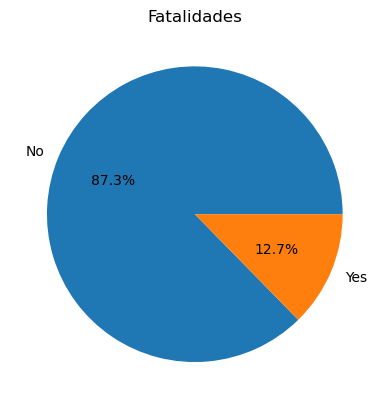

In [98]:

df_counts = data['fatal(y/n)'].value_counts()

# Crear gráfico de quesitos
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%')

# Personalizar el gráfico
plt.title('Fatalidades')

# Mostrar el gráfico
plt.show()

Vamos a seleccionar solo algunas columnas como objetivo, vamos a crear un subset

In [92]:
columnas_estudio = ['year', 'fatal(y/n)']

subset_data = data[columnas_estudio]

subset_data.head()

,year,fatal(y/n)
0,2018,No
1,2018,No
2,2018,No
3,2018,No
4,2018,No


Vamos a estudiar por decadas de años la mortalidad de los ataques

# Década de los 60

In [110]:
a = data.loc[(data['year']>=1960) & (data['year']<1970)]
a

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
2945,3205,1969-11-30,1969,Unprovoked,AUSTRALIA,Western Australia,"Swan River, 13 miles upstream",Swimming,Graham Cartwright,m,15.0,Left thigh lacerated,No,Afternoon,unknown,"Sydney Morning Herald, 12/1/1969",1969.11.30-Cartwright.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
2946,3206,1969-11-11,1969,Unprovoked,USA,Hawaii,"Barbers Point, O'ahu",Scuba diving for lobsters,D.R. McGinnis,m,unknown,"Abrasions on upper leg, laceration on ankle, s...",No,unknown,mshark,"H.D. Baldridge, p.185; J. Borg, p.74; L. Tayl...",1969.11.11-McGinnis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
2947,3207,1969-11-05,1969,Provoked,AUSTRALIA,New South Wales,"Marineland, Sydney",unknown,A. Robson,m,27.0,PROVOKED INCIDENT,No,unknown,unknown,"J. Green, p.36",1969.11.05-Robson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
2948,3208,1969-10-14,1969,Unprovoked,USA,Hawaii,Hawaii,Diving,Richard Hegeman,m,unknown,No injury,No,Morning,white shark,H.D. Baldridge (1994) SAF Case #1579,1969.10.14-NV-Hegeman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
2949,3209,1969-09-06,1969,Unprovoked,USA,California,"Bird Rock, Tomales Point, near Marin County / ...",Free diving for abalone,Donald Joslin,m,53.0,Leg & ankle severely bitten,No,11h20,white shark,"D. Miller & R. Collier; R. Collier, pp.42-44; ...",1969.09.06-DonaldJoslin_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
2950,3210,1969-08-29,1969,Unprovoked,USA,Florida,"North Beach, St. Lucie County",Floating on his back,D.C. Barnes,m,unknown,Laceration to right leg,No,Afternoon,unknown,"News Tribune, 8/30/1969",1969.08.29-Barnes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
2951,3211,1969-08-22,1969,Provoked,USA,Massachusetts,40 miles south of Nantucket,Fishing,Robert Eleniefsky,m,28.0,Leg bitten by netted shark PROVOKED INCIDENT,No,unknown,unknown,"Portsmouth Herald, 8/23/1969",1969.08.22-Eleniefsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
2952,3212,1969-08-02,1969,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,John. Wilson,m,15.0,Lacerations to lower leg,No,Morning,unknown,"St. Petersburg Times, 8/3/1969; H.D. Baldridge...",1969.08.02-Wilson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
2953,3213,1969-08-01,1969,Unprovoked,USA,Florida,"St. Petersburg, Pinnellas County",Body surfing,Robert Wamser,m,13.0,Lacerations to right lower leg & left arm and ...,No,16h30,shark,"NYTimes, 8/3/1969",1969.08.01-Wamser.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown
2954,3214,1969-07-27,1969,Provoked,ENGLAND,unknown,unknown,unknown,Eric Brown,m,unknown,Arm lacerated. Recorded as PROVOKED INCIDENT,No,unknown,unknown,H.D. Baldridge (1994) SAF Case #1611,1969.07.27-NV-Brown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0,0,0,unknown,unknown


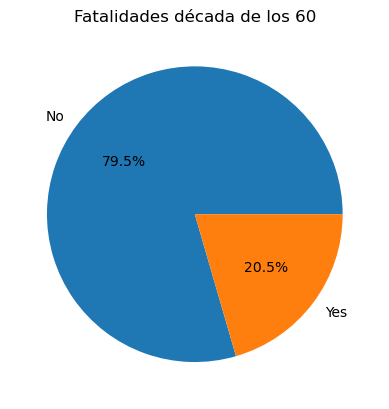

In [109]:

df_counts = a['fatal(y/n)'].value_counts()

# Crear gráfico de quesitos
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%')

# Personalizar el gráfico
plt.title('Fatalidades década de los 60')

# Mostrar el gráfico
plt.show()

# Década de los 70

In [113]:
b= data.loc[(data['year']>=1970) & (data['year']<1980)]    

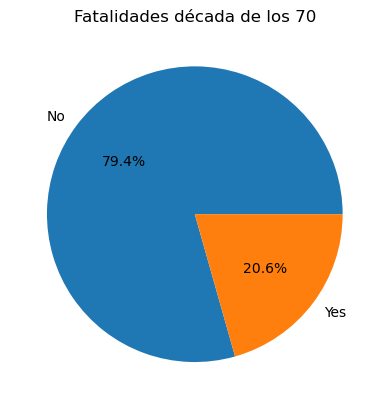

In [114]:
df_counts = b['fatal(y/n)'].value_counts()

# Crear gráfico de quesitos
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%')

# Personalizar el gráfico
plt.title('Fatalidades década de los 70')

# Mostrar el gráfico
plt.show()

# Década de los 80

In [115]:
c =b= data.loc[(data['year']>=1980) & (data['year']<1990)]   

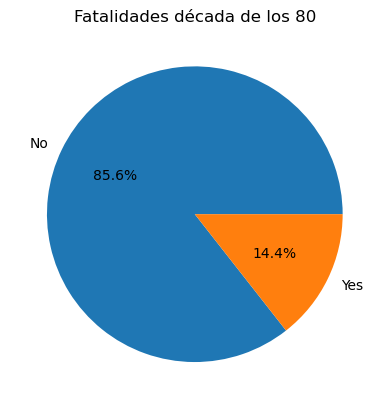

In [116]:
df_counts = b['fatal(y/n)'].value_counts()

# Crear gráfico de quesitos
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%')

# Personalizar el gráfico
plt.title('Fatalidades década de los 80')

# Mostrar el gráfico
plt.show()